### Nama      : Al Fiana Nur Priyanti <br> NIM         : 2109106022


# Posttest KB 6: Unsupervised Learning
### Import library 

In [88]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Membaca dataset

In [89]:
df = pd.read_csv("Breast_Cancer_Bersih.csv")
df.head()

,Unnamed: 0,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.000000,Positive,Positive,24,1,60.0,Alive
1,1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.000000,Positive,Positive,14,5,62.0,Alive
2,2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,30.584862,Positive,Positive,14,7,75.0,Alive
3,3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,30.584862,Positive,Positive,2,1,84.0,Alive
4,4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.000000,Positive,Positive,3,1,73.0,Alive


#### Melihat apakah ada data null atau duplikat

In [90]:
# Cek nilai null
df.isna().sum()

Unnamed: 0                0
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [91]:
# Cek nilai duplikat
df.duplicated().sum()

0

# Subset dan Data Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

df_subset = df[['Regional Node Examined', 'Reginol Node Positive']]
ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

## Gunakan salah satu tipe algoritma pada Unsupervised Learning 


## K-Means Clustering

In [93]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters = 3)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [94]:
labels = model_kmeans.labels_

In [95]:
print(labels)

[0 1 0 ... 1 1 1]


## Membuat Cross_Tab untuk membandingkan antar cluster

In [96]:
df_kmeans = pd.DataFrame({'labels':labels, 'Status':df.Status})
cross_tab = pd.crosstab(df_kmeans['labels'], df_kmeans['Status'])
print(cross_tab)

Status  Alive  Dead
labels             
0        1324   169
1        1836   299
2         240   147


# Melihat Centroid

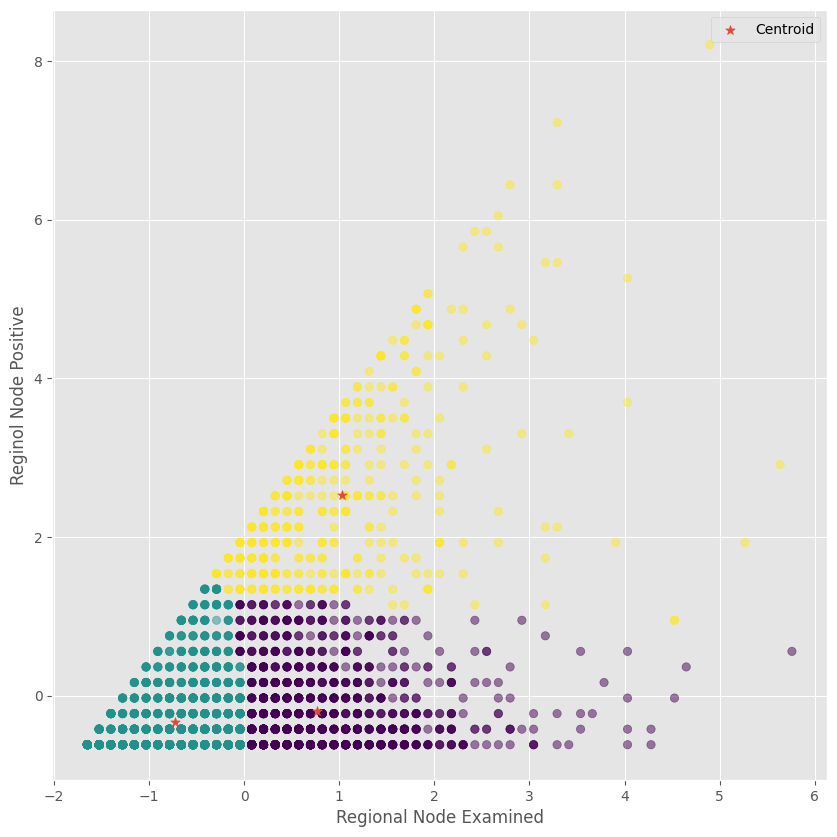

In [97]:
plt.style.use('ggplot')

# Untuk mengambil semua baris pada kolom tertentu (dalam bentuk array)
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

# Menampung koordinat dari tiap centroid
centroids = model_kmeans.cluster_centers_

# Memisahkan centroid koordinat x dan koordinat y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Visualisasi Cluster
plt.figure(figsize=(10,10))
plt.scatter(xs, ys, alpha=0.5, c = labels)
plt.scatter(centroids_x, centroids_y, label="Centroid", marker="*", s=50)
plt.xlabel("Regional Node Examined")
plt.ylabel("Reginol Node Positive")

plt.legend()
plt.show()

# Label Aktual

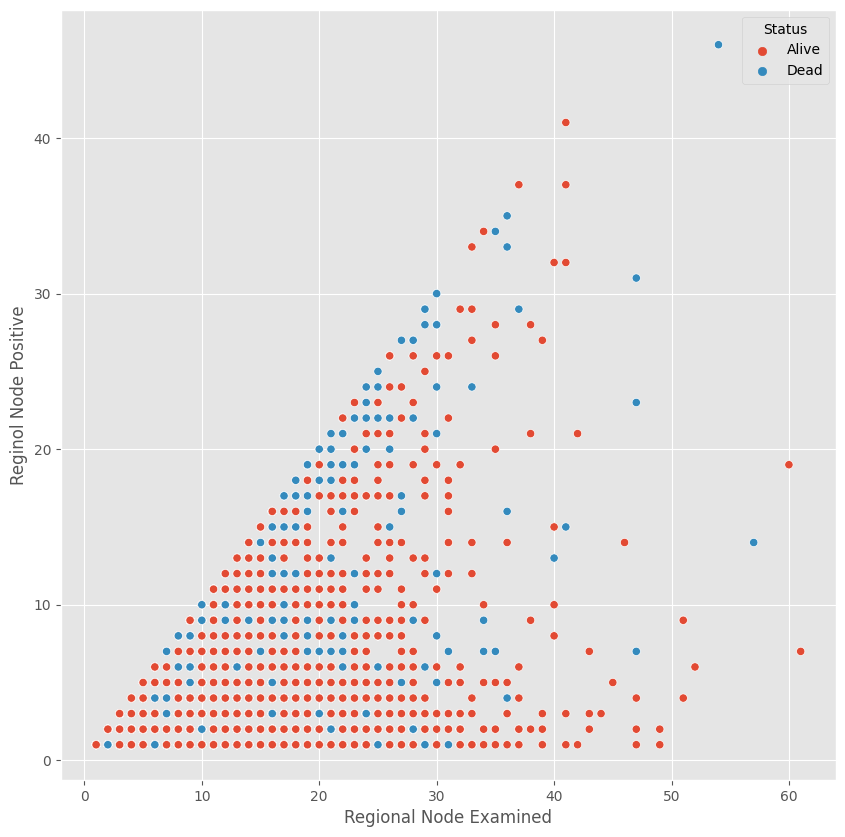

In [98]:
plt.figure(figsize=(10,10))
df_aktual = df[["Regional Node Examined", "Reginol Node Positive", "Status"]]
sns.scatterplot(x = "Regional Node Examined", 
                y = "Reginol Node Positive", 
                data = df_aktual, 
                hue = "Status")
plt.show()

## Menentukan Jumlah Cluster

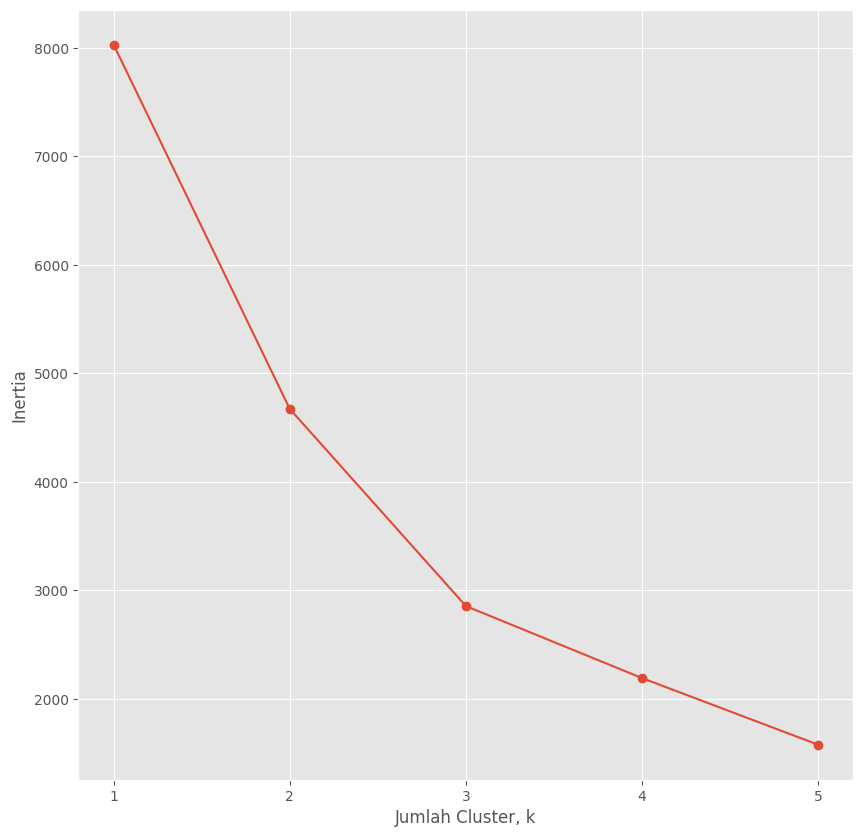

In [99]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

# Evaluasi Model K-Means

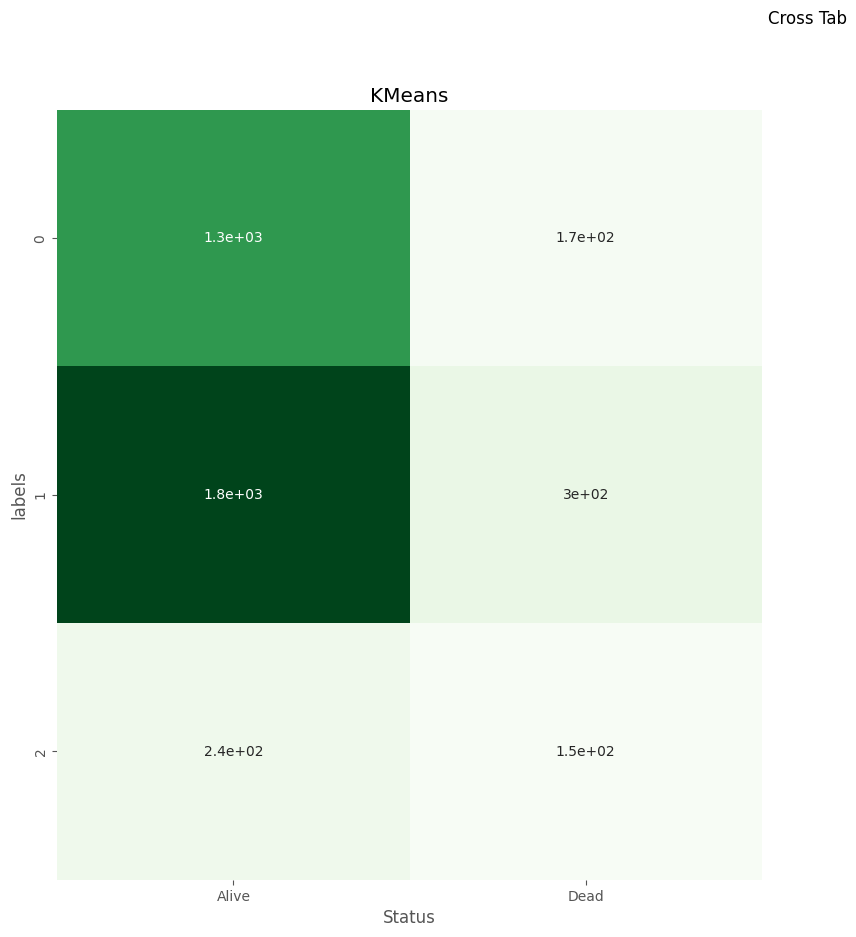

In [100]:
plt.figure(figsize=(20,10))
plt.suptitle("Cross Tab")

plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(cross_tab, annot=True, cbar=False, cmap="Greens")

plt.show()